<a href="https://colab.research.google.com/github/kjh1311990/face/blob/main/face_feature_extract_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from keras.applications.resnet50 import ResNet50
#from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.models import Model
import numpy as np
from os import listdir, walk
from os.path import isfile, join
import itertools

def getAllFilesInDirectory(directoryPath: str):
    return [(directoryPath + "/" + f) for f in listdir(directoryPath) if isfile(join(directoryPath, f))]

def predict(img_path : str, model: Model):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return model.predict(x)

def findDifference(f1, f2):
    print(np.linalg.norm(f1-f2));
    return np.linalg.norm(f1-f2)

def findDifferences(feature_vectors):
    similar: dict = {}
    keys = [k for k,v in feature_vectors.items()]
    min : dict = {}
    for k in keys:
        min[k] = 10000000
    possible_combinations=list(itertools.combinations(keys, 2))
    for k,v in possible_combinations:
       diff=findDifference(feature_vectors[k],feature_vectors[v])
       if(diff < min[k]):
           min[k] = diff
           similar[k] = v
           min[v] = diff
           similar[v] = k
    return similar 

In [9]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [18]:
model = ResNet50(weights="imagenet")

In [13]:
img = image.load_img('/gdrive/My Drive/Notebooks/face/daf.jpg', target_size=(224, 224))

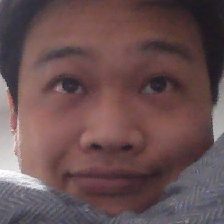

In [14]:
img

In [15]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [16]:
a = (model.predict(x)*8192).astype(int)

In [17]:
a

array([[   0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,
           0,    0,    1,    0,    2,    0,    0,    0,    1,    0,    0,
           0,    0,   11,    0,    0,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    9,    1,    0,    2,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,   92,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    7,    0,    6,    0,    0,    0,    1,    8,
           0,    2,    0,    0,    0,    1,    0,    0,    0,    1,  238,
           0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    1,    0,    0,    0,    6,    0,   13,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    1,    2,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    1,    0,    0, 